A **wordcloud** is a collage of the **most frequently used** and **relevant words** from a given text. The **more prominently featured** and **larger** a word in a wordcloud, the **more relevant** that word is to the **given text**.

In [281]:
#import packages needed
import PyPDF2 
import nltk
import re
import string
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk import pos_tag 
from nltk.corpus import wordnet #Contains the database for looking up word meanings and base forms.
from nltk.stem import WordNetLemmatizer #Actual tool that reduces a word to its base form.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Download necessary NLTK resources
nltk.download('wordnet') 
nltk.download('omw-1.4')  #Supports multiple languages in WordNet (important if you're working with non-English words).
nltk.download('averaged_perceptron_tagger_eng') #Averaged Perceptron Tagger is a tool in NLTK for identifying the part of speech (POS) of words in a sentence.
nltk.download('stopwords') # Download the stopwords dataset
nltk.download('punkt_tab') #downloads the necessary data files for tokenization, including punkt_tab.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [282]:
KNCCI_sub = open('VF_KNCCI Submissions on the Tax Laws Amendment Bill 2024.pdf', 'rb') # open the file
doc = PyPDF2.PdfReader(KNCCI_sub) # initialize the PDF object

In [283]:
# Access the first page
page_1 = doc.pages[0] 
# Extract and print the text
print(page_1.extract_text())   

 
1 | P a g e  
 
 
KNCCI Submissions on the Tax Laws Amendment Bill 2024  
KNCCI is the longest serving independent voice of the private sector.  We are a membership -based 
organization with over 2 million members, majority of who are micro small and medium enterprises (MSMEs), 
and with representation in all the 47 counties through our County Chapters. We advocate for the creation of 
a favorable trade and investment environment that  supports enterprise expansion.  
We have reviewed the Tax Laws Amendment  Bill 2024 and highligh ted the key proposed changes below:  
No Section of Bill  Recommendation  Justification  
1 Section 5  
 
12E (4) on tax payable for  
Significant Economic 
Presence Tax  
 
For purposes of computing the 
tax under subsection (1), the 
taxable profit of a person liable 
to pay the tax shall be deemed 
to be ten percent  of the gross 
turnover.  
 
(Pg. 1016)  
 Replace ‘ten 
percent ’ with ‘five 
percent ’ 
 
For purposes of 
computing the tax 
under subsec

### Perform text processing using Natural Language Toolkit (NLTK) library

In [285]:
#first split all the text from the PDF into a sequence of unique words (tokenize) and create a list of all words from the PDF
# loop through each page, tokenizing all words into a single list
words = []
for page in range(4): # Pages 1-4 
    words.extend(word_tokenize(doc.pages[page].extract_text())) 
print(words)

['1', '|', 'P', 'a', 'g', 'e', 'KNCCI', 'Submissions', 'on', 'the', 'Tax', 'Laws', 'Amendment', 'Bill', '2024', 'KNCCI', 'is', 'the', 'longest', 'serving', 'independent', 'voice', 'of', 'the', 'private', 'sector', '.', 'We', 'are', 'a', 'membership', '-based', 'organization', 'with', 'over', '2', 'million', 'members', ',', 'majority', 'of', 'who', 'are', 'micro', 'small', 'and', 'medium', 'enterprises', '(', 'MSMEs', ')', ',', 'and', 'with', 'representation', 'in', 'all', 'the', '47', 'counties', 'through', 'our', 'County', 'Chapters', '.', 'We', 'advocate', 'for', 'the', 'creation', 'of', 'a', 'favorable', 'trade', 'and', 'investment', 'environment', 'that', 'supports', 'enterprise', 'expansion', '.', 'We', 'have', 'reviewed', 'the', 'Tax', 'Laws', 'Amendment', 'Bill', '2024', 'and', 'highligh', 'ted', 'the', 'key', 'proposed', 'changes', 'below', ':', 'No', 'Section', 'of', 'Bill', 'Recommendation', 'Justification', '1', 'Section', '5', '12E', '(', '4', ')', 'on', 'tax', 'payable', '

### Reduce the complexity of the word list (cleaning).

In [287]:
# Remove capitalization
#Convert the word List to a String 
word_string = ' '.join(words)
#Convert to lowercase 
words = word_string.lower()

In [288]:
#Remove page content i.e. 1 | p a g e using regex
words = re.sub(r'\d\s*\|\s*p\s*a\s*g\s*e', '', words)

In [289]:
# remove those section words from the original text i.e. section 15 15 ( b ) ( i ) ( u ) and 15 ( b ) ( ii ) ( b ) ( iii ) ( n ) etc
words = re.sub(r'section\s\d+(?:\s[\d\w]+)?(?:\s\(\s?[a-zA-Z0-9]+\s?\))+|section\s\d+(?:\s[\d\w]+)?', '', words)

In [290]:
# remove bracketed_words like  ( pg 1030 ), ( sku ), ( b ) ( ii ) ( b ) ( iii ) ( n ) etc
words = re.sub(r'\(.*?\)', '', words)
print(words)

 kncci submissions on the tax laws amendment bill 2024 kncci is the longest serving independent voice of the private sector . we are a membership -based organization with over 2 million members , majority of who are micro small and medium enterprises  , and with representation in all the 47 counties through our county chapters . we advocate for the creation of a favorable trade and investment environment that supports enterprise expansion . we have reviewed the tax laws amendment bill 2024 and highligh ted the key proposed changes below : no section of bill recommendation justification 1  on tax payable for significant economic presence tax for purposes of computing the tax under subsection  , the taxable profit of a person liable to pay the tax shall be deemed to be ten percent of the gross turnover .  replace ‘ ten percent ’ with ‘ five percent ’ for purposes of computing the tax under subsect ion  , the taxable profit of a person liable to pay the tax shall be deemed to be five perc

In [291]:
#Remove stopwords
# Convert words back to a list first to enable looping in the stopword removal
words= words.split()

In [292]:
# Get the built-in list of English stopwords from NLTK.
stop_words = set(stopwords.words('english')) 

# Add custom words to the stopword list
custom_stop_words = ["kncci", "kenyachamber", "submissions", "tax", "bill", "2024", "laws", "kncci.pra", "kenyachamber.or.ke", "kes", "per"]  
new_stopwords = stop_words.union(custom_stop_words)


# Remove stopwords using a list comprehension
words = [word for word in words if word not in new_stopwords]
print(words)


['amendment', 'longest', 'serving', 'independent', 'voice', 'private', 'sector', '.', 'membership', '-based', 'organization', '2', 'million', 'members', ',', 'majority', 'micro', 'small', 'medium', 'enterprises', ',', 'representation', '47', 'counties', 'county', 'chapters', '.', 'advocate', 'creation', 'favorable', 'trade', 'investment', 'environment', 'supports', 'enterprise', 'expansion', '.', 'reviewed', 'amendment', 'highligh', 'ted', 'key', 'proposed', 'changes', ':', 'section', 'recommendation', 'justification', '1', 'payable', 'significant', 'economic', 'presence', 'purposes', 'computing', 'subsection', ',', 'taxable', 'profit', 'person', 'liable', 'pay', 'shall', 'deemed', 'ten', 'percent', 'gross', 'turnover', '.', 'replace', '‘', 'ten', 'percent', '’', '‘', 'five', 'percent', '’', 'purposes', 'computing', 'subsect', 'ion', ',', 'taxable', 'profit', 'person', 'liable', 'pay', 'shall', 'deemed', 'five', 'percent', 'gross', 'turnover', '.', '\uf0b7', 'steep', 'rate', 'hike', ':

In [293]:
# Remove punctuation using string.punctuation
words = [word for word in words if word not in string.punctuation]
print(words)

['amendment', 'longest', 'serving', 'independent', 'voice', 'private', 'sector', 'membership', '-based', 'organization', '2', 'million', 'members', 'majority', 'micro', 'small', 'medium', 'enterprises', 'representation', '47', 'counties', 'county', 'chapters', 'advocate', 'creation', 'favorable', 'trade', 'investment', 'environment', 'supports', 'enterprise', 'expansion', 'reviewed', 'amendment', 'highligh', 'ted', 'key', 'proposed', 'changes', 'section', 'recommendation', 'justification', '1', 'payable', 'significant', 'economic', 'presence', 'purposes', 'computing', 'subsection', 'taxable', 'profit', 'person', 'liable', 'pay', 'shall', 'deemed', 'ten', 'percent', 'gross', 'turnover', 'replace', '‘', 'ten', 'percent', '’', '‘', 'five', 'percent', '’', 'purposes', 'computing', 'subsect', 'ion', 'taxable', 'profit', 'person', 'liable', 'pay', 'shall', 'deemed', 'five', 'percent', 'gross', 'turnover', '\uf0b7', 'steep', 'rate', 'hike', 'much', 'significant', 'economic', 'aligns', 'pillar

### Identify the part of speech for each word then use Lemmatization (simplify words by converting them to their dictionary form)
- **WordNetLemmatizer** from the NLTK library is used.
- **Part-Of-Speech** tags guide the lemmatization process, ensuring that each word is reduced to the correct root form based on its role in the sentence.


In [295]:
# Will lemmatize based on the part of speech (POS) tag determined through NLTK's pos_tag
# A function to derive given words POS
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    #This dictionary translates shorthand POS tags
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) #Looks up the tag in tag_dict. If the tag doesn’t match any key (e.g., a rare POS), it defaults to noun (wordnet.NOUN).

# Use the lemmatizer to reduce the word based on its POS
words = [WordNetLemmatizer().lemmatize(w, get_wordnet_pos(w)) for w in words]
print(words)


['amendment', 'long', 'serve', 'independent', 'voice', 'private', 'sector', 'membership', '-based', 'organization', '2', 'million', 'member', 'majority', 'micro', 'small', 'medium', 'enterprise', 'representation', '47', 'county', 'county', 'chapter', 'advocate', 'creation', 'favorable', 'trade', 'investment', 'environment', 'support', 'enterprise', 'expansion', 'review', 'amendment', 'highligh', 'ted', 'key', 'propose', 'change', 'section', 'recommendation', 'justification', '1', 'payable', 'significant', 'economic', 'presence', 'purpose', 'compute', 'subsection', 'taxable', 'profit', 'person', 'liable', 'pay', 'shall', 'deem', 'ten', 'percent', 'gross', 'turnover', 'replace', '‘', 'ten', 'percent', '’', '‘', 'five', 'percent', '’', 'purpose', 'compute', 'subsect', 'ion', 'taxable', 'profit', 'person', 'liable', 'pay', 'shall', 'deem', 'five', 'percent', 'gross', 'turnover', '\uf0b7', 'steep', 'rate', 'hike', 'much', 'significant', 'economic', 'aligns', 'pillar', '2', 'oecd', 'requirem

### WordCloud Generation

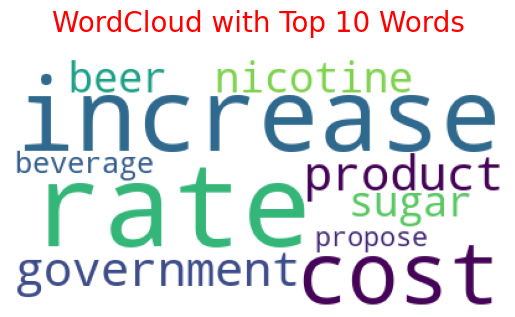

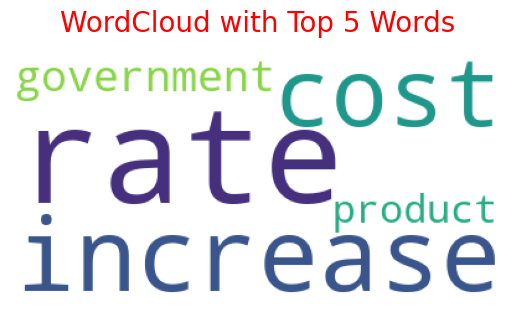

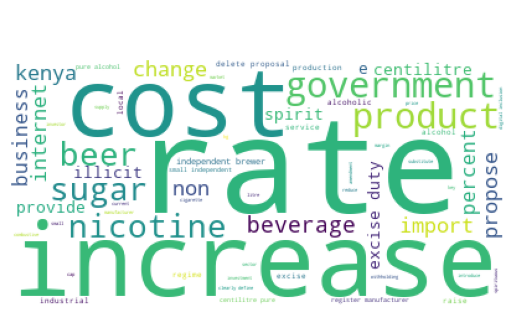

In [297]:

# create a single string of space separated words
words=" ".join(words)

# Define a function to generate, display, and save a WordCloud
def generate_wordcloud(words, max_words, title, filename):
    word_cloud = WordCloud(background_color="white", max_words=max_words).generate(words)
    
    # Save the WordCloud as a file
    word_cloud.to_file(filename)
    
    # Display the WordCloud
    # plt.figure(figsize=(10, 8))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(f"{title}", fontsize=20, pad=20, color="red")
    plt.show()

# WordCloud with max_words=10
generate_wordcloud(words, max_words=10, title="WordCloud with Top 10 Words", filename="word_cloud_10.png")

# WordCloud with max_words=5
generate_wordcloud(words, max_words=5, title="WordCloud with Top 5 Words", filename="word_cloud_5.png")

# WordCloud for all words (no max_words limit)
generate_wordcloud(words, max_words=None, title=" ", filename="word_cloud_a.png")


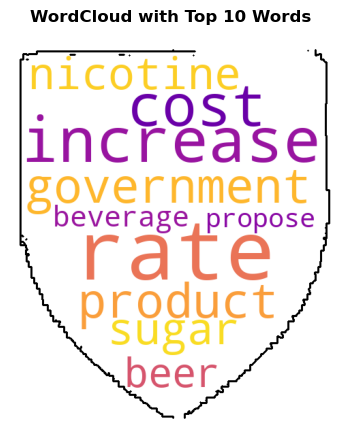

In [298]:
#Use shapefile to plot the wordcloud
cloud_mask = np.array(Image.open("case.png"))
wordcloud = WordCloud(background_color="white", max_words=10, mask=cloud_mask, contour_width=2, contour_color='black', colormap="plasma").generate(words)

#Display the wordcloud!
#plt.figure(figsize=(10,8))
plt.title("WordCloud with Top 10 Words", pad=20, weight="bold")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


wordcloud.to_file("word_cloud_masked.png")